# Determine Winning Nation: Deep Learning Neural Network

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from tensorflow.keras.utils import to_categorical

In [2]:
#import csv
df = pd.read_csv('data/nations_final.csv')
print(df.shape)
df.head()

(2047, 18)


,NOC,Team,Games,Year,GDP,Population,Sports,Events,Athletes per Event,Median Competitor Age,Median Competitor Height,Median Competitor Weight,Summer,Home_Field_Adv,Golds,Silvers,Bronzes,Total Medals
0,ALG,Algeria,1980 Summer,1980,42.346,18.666,9,27,1.778,23.0,175.0,67.0,1,0,0,0,0,0
1,ANG,Angola,1980 Summer,1980,6.639,8.910,3,14,0.786,18.0,169.0,63.0,1,0,0,0,0,0
2,AUS,Australia,1980 Summer,1980,162.628,14.802,17,92,1.304,22.0,179.5,71.0,1,0,6,2,5,13
3,AUT,Austria,1980 Summer,1980,80.923,7.540,16,51,1.627,23.0,178.0,71.0,1,0,1,3,1,5
4,BEL,Belgium,1980 Summer,1980,123.478,9.855,10,51,1.157,22.0,175.5,68.5,1,0,1,0,0,1


In [3]:
df.nunique()

NOC                          185
Team                         217
Games                         20
Year                          16
GDP                         1871
Population                  1800
Sports                        34
Events                       188
Athletes per Event           667
Median Competitor Age         60
Median Competitor Height      75
Median Competitor Weight     104
Summer                         2
Home_Field_Adv                 2
Golds                         64
Silvers                       62
Bronzes                       64
Total Medals                 113
dtype: int64

AUS    23
GBR    23
NED    23
SWE    23
FRA    22
       ..
SAM     4
MHL     3
TUV     3
SSD     1
KOS     1
Name: NOC, Length: 185, dtype: int64


<AxesSubplot:ylabel='Density'>

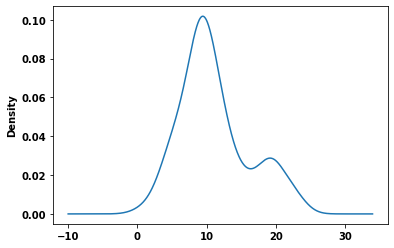

In [4]:
NOC_count = df['NOC'].value_counts()
print(NOC_count)
NOC_count.plot.density()

In [5]:
medals = df.groupby(['NOC', 'Team'])[['Total Medals', 'Golds', 'Silvers', 'Bronzes']].sum()
medals = medals.sort_values(by="Total Medals", ascending=False).reset_index()
medals.head(20)

,NOC,Team,Total Medals,Golds,Silvers,Bronzes
0,USA,United States,2761,1274,823,664
1,GER,Germany,1262,460,369,433
2,RUS,Russia,1132,379,356,397
3,CHN,China,985,350,345,290
4,AUS,Australia,981,262,322,397
5,CAN,Canada,860,312,288,260
6,ITA,Italy,738,205,244,289
7,GBR,Great Britain,734,235,233,266
8,FRA,France,712,220,215,277
9,NED,Netherlands,600,193,215,192


In [6]:
total_medal_count = df['Total Medals'].sum()
medals['% Medals Won'] = (medals["Total Medals"]/total_medal_count * 100).round(3)
top_nations = medals.sort_values(by="% Medals Won", ascending=False)
print(f"Top 20 Medaling Nations: Percentage of All Medals Won")
print(f"{round(sum(medals['% Medals Won'].head(20)),3)} %")


top_nations.head(20)

Top 20 Medaling Nations: Percentage of All Medals Won
80.843 %


,NOC,Team,Total Medals,Golds,Silvers,Bronzes,% Medals Won
0,USA,United States,2761,1274,823,664,14.887
1,GER,Germany,1262,460,369,433,6.805
2,RUS,Russia,1132,379,356,397,6.104
3,CHN,China,985,350,345,290,5.311
4,AUS,Australia,981,262,322,397,5.290
5,CAN,Canada,860,312,288,260,4.637
6,ITA,Italy,738,205,244,289,3.979
7,GBR,Great Britain,734,235,233,266,3.958
8,FRA,France,712,220,215,277,3.839
9,NED,Netherlands,600,193,215,192,3.235


## Top 20 Nations: Count of Medal Type Won

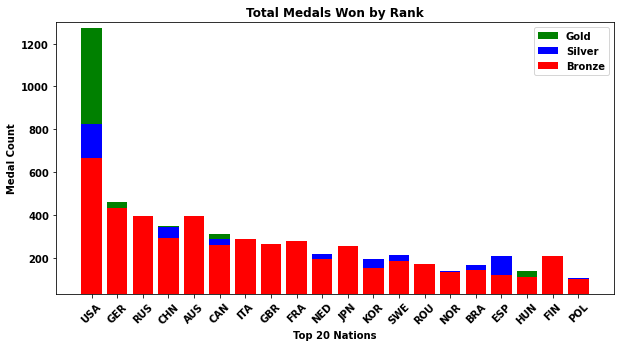

In [7]:
plt.figure(figsize=(10,5))
x = top_nations.head(20)['NOC'].tolist()
y1 = top_nations.head(20)['Golds'].tolist()
y2 = top_nations.head(20)['Silvers'].tolist()
y3 = top_nations.head(20)['Bronzes'].tolist()
plt.bar(x, y1, color='g')
plt.bar(x, y2, color='b')
plt.bar(x, y3, color='r')
plt.xlabel("Top 20 Nations")
plt.ylabel('Medal Count')
plt.legend(['Gold', 'Silver', 'Bronze'])
plt.title("Total Medals Won by Rank")
plt.xticks(x, visible=True, rotation=45)

y_min = 30
y_max = 1300
plt.ylim([y_min, y_max])
plt.show()

In [8]:
# Worst Nations - Any nation not in top 20 with % medals won less than #20 rank and have at least won a medal historically
worst_nations = top_nations[top_nations["% Medals Won"]<1.326]
print(f"Next 20 Medaling Nations: Percentage of All Medals Won")
print(f"{round(sum(worst_nations['% Medals Won'].head(20)),3)} %")
worst_nations

Next 20 Medaling Nations: Percentage of All Medals Won
13.951 %


,NOC,Team,Total Medals,Golds,Silvers,Bronzes,% Medals Won
20,SUI,Switzerland,243,65,84,94,1.310
21,BUL,Bulgaria,218,33,88,97,1.175
22,AUT,Austria,216,63,73,80,1.165
23,ARG,Argentina,196,70,53,73,1.057
24,UKR,Ukraine,194,46,51,97,1.046
...,...,...,...,...,...,...,...
158,JPN,Dow Jones,0,0,0,0,0.000
157,YEM,Yemen,0,0,0,0,0.000
156,JPN,Whisper,0,0,0,0,0.000
155,ALB,Albania,0,0,0,0,0.000


In [9]:
print(len(worst_nations['NOC'].unique()))

174


## Top 40 Nations : Total Medal Counts 

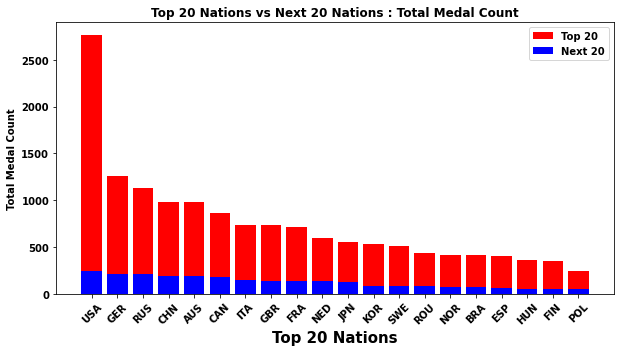

In [10]:
plt.figure(figsize=(10,5))
x_top = top_nations.head(20)['NOC'].tolist()
y_top = top_nations.head(20)['Total Medals'].tolist()
y_bottom = worst_nations.head(20)['Total Medals'].tolist()

plt.bar(x, y_top, color='r')
plt.bar(x, y_bottom, color='b')
plt.xlabel('Top 20 Nations', fontsize=15)
plt.ylabel('Total Medal Count')
plt.title('Top 20 Nations vs Next 20 Nations : Total Medal Count')
plt.xticks(x_top, visible=True, rotation=45)
plt.legend(['Top 20', 'Next 20'])
plt.savefig("images/top40.png")
plt.show()

In [11]:
keep = list(top_nations['NOC'].head(20).unique())
keep

['USA',
 'GER',
 'RUS',
 'CHN',
 'AUS',
 'CAN',
 'ITA',
 'GBR',
 'FRA',
 'NED',
 'JPN',
 'KOR',
 'SWE',
 'ROU',
 'NOR',
 'BRA',
 'ESP',
 'HUN',
 'FIN',
 'POL']

NameError: name 'replace_noc' is not defined

In [13]:
# Reduce number of unique naiton classifiers to 21 - Top 20 Medaling Nations and "Other"
keep = list(top_nations['NOC'].head(20).unique())

# Create a copy of the dataframe for iterable purposes
df2 = df.copy()

# Replace Nation in dataframe
df2.loc[~df2['NOC'].isin(keep), 'NOC'] = "Other"

# Check to make sure binning was successful
print(len(df2.NOC.value_counts()))
df2.NOC.value_counts()

21


Other    1647
GBR        23
AUS        23
SWE        23
NED        23
USA        22
JPN        22
FRA        22
CAN        22
ESP        20
ITA        20
FIN        20
ROU        20
NOR        19
HUN        19
POL        19
CHN        19
KOR        19
GER        17
BRA        16
RUS        12
Name: NOC, dtype: int64

In [16]:
# Double check the dataframe
df2.sample(n=5)

,NOC,Team,Games,Year,GDP,Population,Sports,Events,Athletes per Event,Median Competitor Age,Median Competitor Height,Median Competitor Weight,Summer,Home_Field_Adv,Golds,Silvers,Bronzes,Total Medals
1483,RUS,Russia,2008 Summer,2008,1779.110,142.737,29,242,1.872,25.0,177.0,68.0,1,0,43,46,53,142
308,Other,New Zealand,1988 Summer,1988,45.442,3.331,16,56,1.411,26.5,179.0,74.0,1,0,4,4,15,23
12,Other,Cyprus,1980 Summer,1980,2.314,0.509,3,13,1.077,22.0,176.0,71.0,1,0,0,0,0,0
955,Other,Panama,2000 Summer,2000,12.502,3.041,5,7,0.857,24.0,170.0,70.0,1,0,0,0,0,0
441,Other,Iceland,1992 Summer,1992,7.112,0.260,5,10,1.300,28.5,189.0,96.0,1,0,0,0,0,0


In [17]:
# Set features for model
drop_features = ['NOC','Team','Games', 'Year']
# Split our preprocessed data into our features and target arrays
X = df2
X = X.drop(drop_features, axis=1).values
y = df2['NOC'].values
print(X.shape, y.shape)

(2047, 14) (2047,)


In [18]:
# Split data into training and testing groups and scale data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1535, 14) (1535,) (512, 14) (512,)


In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step (1): Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step (2): Convert encoded labels using to_categorical()
y_train_cat = to_categorical(encoded_y_train, 21)
y_test_cat = to_categorical(encoded_y_test, 21)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 25

# Define the model
nn= Sequential()

# First hidden layer
nn.add(Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer- softmax =generalization of the logistic function to multiple dimensions.
nn.add(Dense(units=21, activation="softmax"))


In [21]:
# summarize the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                750       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 21)                546       
Total params: 2,571
Trainable params: 2,571
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile and fit the model
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Fit the model to the training data
nn.fit(X_train_scaled, y_train_cat, epochs=100, shuffle=True, verbose=2)

# Evaluate model using training data
model_loss, model_accuracy = nn.evaluate(X_train_scaled,y_train_cat,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
48/48 - 1s - loss: 2.6990 - accuracy: 0.4352
Epoch 2/100
48/48 - 0s - loss: 1.4581 - accuracy: 0.8130
Epoch 3/100
48/48 - 0s - loss: 0.8319 - accuracy: 0.8169
Epoch 4/100
48/48 - 0s - loss: 0.7500 - accuracy: 0.8202
Epoch 5/100
48/48 - 0s - loss: 0.7120 - accuracy: 0.8228
Epoch 6/100
48/48 - 0s - loss: 0.6831 - accuracy: 0.8274
Epoch 7/100
48/48 - 0s - loss: 0.6581 - accuracy: 0.8300
Epoch 8/100
48/48 - 0s - loss: 0.6347 - accuracy: 0.8345
Epoch 9/100
48/48 - 0s - loss: 0.6135 - accuracy: 0.8352
Epoch 10/100
48/48 - 0s - loss: 0.5915 - accuracy: 0.8410
Epoch 11/100
48/48 - 0s - loss: 0.5689 - accuracy: 0.8463
Epoch 12/100
48/48 - 0s - loss: 0.5455 - accuracy: 0.8482
Epoch 13/100
48/48 - 0s - loss: 0.5259 - accuracy: 0.8515
Epoch 14/100
48/48 - 0s - loss: 0.5080 - accuracy: 0.8573
Epoch 15/100
48/48 - 0s - loss: 0.4883 - accuracy: 0.8586
Epoch 16/100
48/48 - 0s - loss: 0.4712 - accuracy: 0.8638
Epoch 17/100
48/48 - 0s - loss: 0.4562 - accuracy: 0.8664
Epoch 18/100
48/48 - 0s

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test_cat, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

16/16 - 0s - loss: 0.5543 - accuracy: 0.8633
Deep Neural Network - Loss: 0.554343044757843, Accuracy: 0.86328125


In [24]:
prediction = np.argmax(nn.predict(X_test_scaled), axis = -1)
predicted_labels = label_encoder.inverse_transform(prediction)
print(f"Predicted Labels: {predicted_labels[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted Labels: ['Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'SWE' 'Other' 'Other'
 'USA']
Actual Labels: ['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'NED', 'Other', 'Other', 'USA']


# Only Predict Top 20 Nations - Filter out "Other"

In [25]:
df2.head()

,NOC,Team,Games,Year,GDP,Population,Sports,Events,Athletes per Event,Median Competitor Age,Median Competitor Height,Median Competitor Weight,Summer,Home_Field_Adv,Golds,Silvers,Bronzes,Total Medals
0,Other,Algeria,1980 Summer,1980,42.346,18.666,9,27,1.778,23.0,175.0,67.0,1,0,0,0,0,0
1,Other,Angola,1980 Summer,1980,6.639,8.910,3,14,0.786,18.0,169.0,63.0,1,0,0,0,0,0
2,AUS,Australia,1980 Summer,1980,162.628,14.802,17,92,1.304,22.0,179.5,71.0,1,0,6,2,5,13
3,Other,Austria,1980 Summer,1980,80.923,7.540,16,51,1.627,23.0,178.0,71.0,1,0,1,3,1,5
4,Other,Belgium,1980 Summer,1980,123.478,9.855,10,51,1.157,22.0,175.5,68.5,1,0,1,0,0,1


In [26]:
df3 = df2[df2['NOC']!="Other"]
print(df3.shape)
df3.head()

(400, 18)


,NOC,Team,Games,Year,GDP,Population,Sports,Events,Athletes per Event,Median Competitor Age,Median Competitor Height,Median Competitor Weight,Summer,Home_Field_Adv,Golds,Silvers,Bronzes,Total Medals
2,AUS,Australia,1980 Summer,1980,162.628,14.802,17,92,1.304,22.0,179.5,71.0,1,0,6,2,5,13
7,BRA,Brazil,1980 Summer,1980,145.819,118.563,14,72,1.458,21.5,181.0,73.0,1,0,4,0,5,9
16,ESP,Spain,1980 Summer,1980,230.759,37.656,18,75,2.053,23.0,178.0,72.5,1,0,2,19,3,24
18,FIN,Finland,1980 Summer,1980,53.714,4.771,16,71,1.479,25.0,180.0,75.0,1,0,3,1,5,9
19,FRA,France,1980 Summer,1980,702.243,53.731,13,85,1.424,24.0,176.0,67.0,1,0,18,5,6,29


In [27]:
df3['NOC'].unique()

array(['AUS', 'BRA', 'ESP', 'FIN', 'FRA', 'GBR', 'HUN', 'ITA', 'NED',
       'POL', 'ROU', 'SWE', 'CAN', 'CHN', 'JPN', 'KOR', 'NOR', 'USA',
       'GER', 'RUS'], dtype=object)

In [28]:
# Set features for model
drop_features = ['NOC','Team','Games', 'Year']
# Split our preprocessed data into our features and target arrays
X = df3
X = X.drop(drop_features, axis=1).values
y = df3['NOC'].values
print(X.shape, y.shape)


(400, 14) (400,)


In [ ]:
# Split data into training and testing groups and scale data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step (1): Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step (2): Convert encoded labels using to_categorical()
y_train_cat = to_categorical(encoded_y_train, 20)
y_test_cat = to_categorical(encoded_y_test, 20)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 25

# Define the model
nn= Sequential()

# First hidden layer
nn.add(Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer- softmax =generalization of the logistic function to multiple dimensions.
nn.add(Dense(units=20, activation="softmax"))

# Compile and fit the model
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
nn.fit(X_train_scaled, y_train_cat, epochs=100, shuffle=True, verbose=2)


(300, 14) (300,) (100, 14) (100,)
Epoch 1/100
10/10 - 0s - loss: 2.9873 - accuracy: 0.0700
Epoch 2/100
10/10 - 0s - loss: 2.9059 - accuracy: 0.1133
Epoch 3/100
10/10 - 0s - loss: 2.8367 - accuracy: 0.1567
Epoch 4/100
10/10 - 0s - loss: 2.7721 - accuracy: 0.1700
Epoch 5/100
10/10 - 0s - loss: 2.7117 - accuracy: 0.2067
Epoch 6/100
10/10 - 0s - loss: 2.6505 - accuracy: 0.2267
Epoch 7/100
10/10 - 0s - loss: 2.5930 - accuracy: 0.2433
Epoch 8/100
10/10 - 0s - loss: 2.5352 - accuracy: 0.2767
Epoch 9/100
10/10 - 0s - loss: 2.4780 - accuracy: 0.2833
Epoch 10/100
10/10 - 0s - loss: 2.4199 - accuracy: 0.2967
Epoch 11/100
10/10 - 0s - loss: 2.3663 - accuracy: 0.3133
Epoch 12/100
10/10 - 0s - loss: 2.3083 - accuracy: 0.3267
Epoch 13/100
10/10 - 0s - loss: 2.2528 - accuracy: 0.3433
Epoch 14/100
10/10 - 0s - loss: 2.2002 - accuracy: 0.3667
Epoch 15/100
10/10 - 0s - loss: 2.1478 - accuracy: 0.3833
Epoch 16/100
10/10 - 0s - loss: 2.0963 - accuracy: 0.4000
Epoch 17/100
10/10 - 0s - loss: 2.0465 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test_cat, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
prediction = np.argmax(nn.predict(X_test_scaled), axis = -1)
predicted_labels = label_encoder.inverse_transform(prediction)
print(f"Predicted Labels: {predicted_labels[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")